<a href="https://colab.research.google.com/github/Boboye-x/Boboye-x/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# load the dataset
df = pd.read_csv('/content/data.csv')

In [ ]:
# data head
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
# cleaning the data to make columns uniform.

df.columns = df.columns.str.lower().str.replace(' ', '_')
df['make'].str.lower().str.replace(' ', '_')

df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
# checking data types
# 8 Object data types are interesting to us. converted to python lists and stored as strings
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [ ]:
df['make'].str.lower().str.replace(' ', '_')

0            bmw
1            bmw
2            bmw
3            bmw
4            bmw
          ...   
11909      acura
11910      acura
11911      acura
11912      acura
11913    lincoln
Name: make, Length: 11914, dtype: object

In [ ]:
# looping convert object data type to lower case and replace spaces with underscore in columns to make data cleaner

for col in strings:
  df[col] = df[col].str.lower().str.replace(' ', '_')

In [ ]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [ ]:
# iterate columns and data type
for col in df.columns:
  print(col)

make
model
year
engine_fuel_type
engine_hp
engine_cylinders
transmission_type
driven_wheels
number_of_doors
market_category
vehicle_size
vehicle_style
highway_mpg
city_mpg
popularity
msrp


***Exploratory Analysis*** 

In [ ]:
#iterate columns
for col in df.columns:
  print(col)
  print(df[col].head())
  print()

make
0    bmw
1    bmw
2    bmw
3    bmw
4    bmw
Name: make, dtype: object

model
0    1_series_m
1      1_series
2      1_series
3      1_series
4      1_series
Name: model, dtype: object

year
0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int64

engine_fuel_type
0    premium_unleaded_(required)
1    premium_unleaded_(required)
2    premium_unleaded_(required)
3    premium_unleaded_(required)
4    premium_unleaded_(required)
Name: engine_fuel_type, dtype: object

engine_hp
0    335.0
1    300.0
2    300.0
3    230.0
4    230.0
Name: engine_hp, dtype: float64

engine_cylinders
0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: engine_cylinders, dtype: float64

transmission_type
0    manual
1    manual
2    manual
3    manual
4    manual
Name: transmission_type, dtype: object

driven_wheels
0    rear_wheel_drive
1    rear_wheel_drive
2    rear_wheel_drive
3    rear_wheel_drive
4    rear_wheel_drive
Name: driven_wheels, dtype: object

number_of_doors
0    2.0
1   

In [ ]:
#check for first 10 unique values and number of unique values per column
#NOTE: Unique values are the distinct values that occur only once in the dataset or the first occurrences of duplicate values counted as unique values
for col in df.columns:
  print(col)
  print(df[col].unique()[:10])
  print(df[col].nunique())
  print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler' 'nissan' 'volvo' 'mazda'
 'mitsubishi' 'ferrari']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class' '2_series' '200'
 '200sx' '240sx' '240']
914

year
[2011 2012 2013 1992 1993 1994 2017 1991 2016 1990]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel'
 'electric' 'flex-fuel_(premium_unleaded_recommended/e85)' 'natural_gas'
 'flex-fuel_(premium_unleaded_required/e85)'
 'flex-fuel_(unleaded/natural_gas)']
10

engine_hp
[335. 300. 230. 320. 172. 160. 130. 158. 240. 248.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.  0. nan 10.  3. 16.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'


In [ ]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


***Distribution of Price***


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# -- to make sure all the plots can be displayed in a notebook
%matplotlib inline

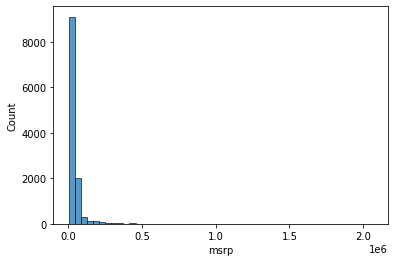

In [ ]:
# plotting the histogram of Maker Suggested Retail Price (MSRP) using seaborn. 1e6 = 10^6 (10 raise to power 6). This kind of distribution is called long tail distribution. 
sns.histplot(df.msrp, bins=50)

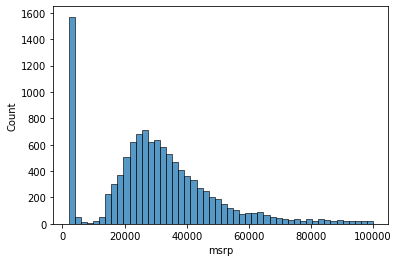

In [ ]:
#shows the prices that are less than 100,000.
#msrp shows suggested maker retail price on the x-axis while count shows the number of cars on the y-axis.
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

In [ ]:
# A Log-Normal Distribution is a continuous probability distribution of a random variable whose logarithm is normally distributed.

#Applying logarithmic distribution to reduce the effect of outliers by transforming values
#Add 1 to the logarithmic distribution

np.log1p([0 , 10 , 1000 , 100000])

array([ 0.        ,  2.39789527,  6.90875478, 11.51293546])

In [ ]:
price_logs = np.log1p(df.msrp)


In [ ]:
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

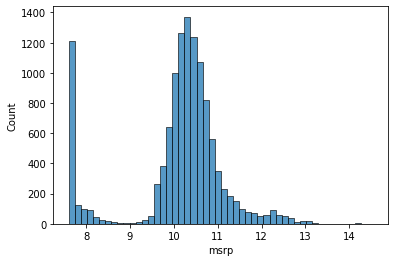

In [ ]:
# normal distribution of major variable after using logarithmic function to transform values
sns.histplot(price_logs, bins=50)

*Missing Values*

In [ ]:
# checking for missing values using summary 

df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

*Setting up validation framework before training a model*

In [ ]:
#splitting the dataset. 
#length of dataset stored as n
#n_val is 20% of dataset converted to an Integer
#n_test is 20% of dataset converted to an integer
#n_train is subtratction of n from n_val and n_test

n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [ ]:
# size of dataframes
n_val, n_test, n_train

(2382, 2382, 7150)

In [ ]:
df.iloc[[10, 0, 3, 5]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
10,bmw,1_series,2013,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39600
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200


In [ ]:
df_train = df.iloc[n_train:]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [ ]:
# rearrange the dataset and store it as idx
idx = np.arange(n)

In [ ]:
# randomly shuffle the dataset
np.random.seed(2)
np.random.shuffle(idx)

In [ ]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [ ]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [ ]:
len(df_test), len(df_train), len(df_val)

(2382, 7150, 2382)

In [ ]:
# dropping the index 

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [ ]:
#transforming the values using logarithmic function and setting it to the train data 
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [ ]:
#deleting the msrp variable from the train dataset

del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [ ]:
len(y_train)

7150

*Linear Regresion - Training the dataset*

g(x) = y

g - Model (Linear Regresion)
x - feature matrix (Training Dataset)
y - target prediction (Price) 

In [ ]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [ ]:
#features from the dataset - engine_hp, city_mpg, popularity
#feature vector

xi = [453, 11, 86]

In [ ]:
# weight vector = w # bias term = w0
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [ ]:
def linear_regression(xi):
  n = len(xi)

  pred = w0

  for j in range(n):
# multiplying feature vector by corresponding weight and storing it as pred variable 
    pred = pred + w[j] * xi[j]
    return pred

In [ ]:
linear_regression(xi)

11.7

In [ ]:
# exponentiation to undo the logarithmic function

np.expm1(11.7)

120570.71498645052

In [ ]:
# using the logarithmic function returns the same prediction value
np.log1p(120570.71498645052)

11.7

***Linear Regression Vector form***

In [ ]:
# function to do the dot product 

def dot(xi, w):
  n = len(xi)

  res = 0.0

  for j in range(n):
    res = res + xi[j] * w[j]

    return res

In [ ]:
def linear_regression(xi):
  return w0  + dot(xi, w)

In [ ]:
# new weight vector

w_new = [w0] + w

In [ ]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [ ]:
# adding fictional feature to make equation shorter 

def linear_regression(xi):
  xi = [1] + xi
  return w0  + dot(xi, w)

In [ ]:
# returns the same result

linear_regression(xi)

7.18

In [ ]:
# weight vector = w # bias term = w0
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [ ]:
# another set of observations - features from dataset

# Turning it into a matrix - list of lists

x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86 ]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [ ]:
# multiplication between our new vector and matrix 

X.dot(w_new)

array([12.38 , 13.552, 12.312])

In [ ]:
# linear regression model

def linear_regression(X):
  return X.dot(w_new)

  

In [ ]:
# linear regression model 

linear_regression(X)

array([12.38 , 13.552, 12.312])

**Training a Linear Regression Model **


In [ ]:
def linear_regression(X, y):
  pass
  

In [ ]:
# matrix list of list - more rows 
X = [
     [148, 24, 1385],
     [132, 25, 2031],
     [453, 11, 86 ],
      [158, 24, 185],
     [172, 25, 201],
     [413, 11, 86 ],
      [38, 54, 135],
     [142, 25, 431],
     [453, 31, 86 ],
]
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  135],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [ ]:
y = [100, 200, 150, 250, 100, 200, 150, 250, 120]

In [ ]:
XTX = X.T.dot(X)

In [ ]:
XTX_inv =  np.linalg.inv(XTX)

LinAlgError: ignored

In [ ]:
XTX_inv.dot(X.T).dot(y)

array([ 3.00555909e+02, -2.27734363e-01, -2.60256482e+00, -2.29402303e-02])